**Actividad 05: Optimizando la pauta digital**<br>
La plataforma digital de servicios QUIX quiere atraer más usuarios. Para ello invertirá en pauta digital. La pauta digital permite configurar las horas en la que las diferentes redes sociales le mostrarán los anuncios de la plataforma a los potenciales usuarios. 

Se ha recogido información sobre datos de conexión de usuarios en un periodo de tiempo (ver adjunto). De acuerdo con esta información, ¿cómo debería distribuir su presupuesto de pauta digital la compañía?



*   Davinson Montoya Ramírez
*   Jessica Rivera
*   Luis Felipe Arevalo Cortes





In [ ]:
#importacion de librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

La base de datos de conexión de usuarios presenta información desde el 21 de diciembre de 2020 hasta el 25 de enero de 2021. Contamos con 5 variables (ID Usuario, Calificadora, Correo, fecha de consulta y estado de usuario). En total tenemos 4022 registros.

In [ ]:
#cargamos la base de datos
df = pd.read_csv("datos_horas_conexion.csv", sep=";")

A continuación se muestra una vista previa de los datos:

In [ ]:
df.head()

,id_usuario,Calificadora,Correo,Fecha Consulta,Estado usuario
0,c2290d89dfc4,Buró de Crédito,gmail.com,19/01/21 9:20,ACTIVO
1,8d24ef1d52d8,Buró de Crédito,gmail.com,19/01/21 8:28,ACTIVO
2,a5120d2c47fa,Buró de Crédito,gmail.com,17/01/21 13:36,ACTIVO
3,5a5d70893606,Buró de Crédito,edubc.mx,20/01/21 9:27,ACTIVO
4,4a2082948031,Buró de Crédito,gmail.com,21/01/21 14:26,ACTIVO


In [ ]:
df.shape

(4022, 5)

Extracción de informacion de fechas y horas.
Para evaluar la estimación del presupuesto debemos conocer el comportamiento de los usuarios dentro de la plataforma. Extraemos información de valor de la fecha, los cuales son el día de la semana y la hora de conexión. La hora se quiere subdividir en 24 intervalos de 1 hora para mejor comprensión.

In [ ]:
df['Fecha'] = pd.to_datetime(df['Fecha Consulta'] ).dt.date

In [ ]:
df['Hora'] = pd.to_datetime(df['Fecha Consulta'] ).dt.time

In [ ]:
df11 = df["Hora"].astype(str).str.split(":", n = 1, expand = True)

In [ ]:
df['Dia'] = pd.to_datetime(df['Fecha Consulta'] ).dt.dayofweek

In [ ]:
df['HORAS'] = df11[0]

In [ ]:
df.head()

,id_usuario,Calificadora,Correo,Fecha Consulta,Estado usuario,Fecha,Hora,Dia,HORAS
0,c2290d89dfc4,Buró de Crédito,gmail.com,19/01/21 9:20,ACTIVO,2021-01-19,09:20:00,1,09
1,8d24ef1d52d8,Buró de Crédito,gmail.com,19/01/21 8:28,ACTIVO,2021-01-19,08:28:00,1,08
2,a5120d2c47fa,Buró de Crédito,gmail.com,17/01/21 13:36,ACTIVO,2021-01-17,13:36:00,6,13
3,5a5d70893606,Buró de Crédito,edubc.mx,20/01/21 9:27,ACTIVO,2021-01-20,09:27:00,2,09
4,4a2082948031,Buró de Crédito,gmail.com,21/01/21 14:26,ACTIVO,2021-01-21,14:26:00,3,14


In [ ]:
dias1 = df.groupby('Dia').count()

In [ ]:
dias1['Dia'] = dias1.index

In [ ]:
print(dias1)

     id_usuario  Calificadora  Correo  Fecha Consulta  ...  Fecha  Hora  HORAS  Dia
Dia                                                    ...                         
0           682           682     664             682  ...    682   682    682    0
1           748           748     748             748  ...    748   748    748    1
2           280           280     280             280  ...    280   280    280    2
3           591           591     591             591  ...    591   591    591    3
4           492           492     492             492  ...    492   492    492    4
5           499           499     499             499  ...    499   499    499    5
6           730           730     729             730  ...    730   730    730    6

[7 rows x 9 columns]


El top 3 de los días más frecuentes son:


1.   Martes (748 conexiones)
2.   Domingo (730 conexiones)
3.   Lunes (682 conexiones)

El miércoles es el día en que menos visitaron la página web con 280 conexiones en total.



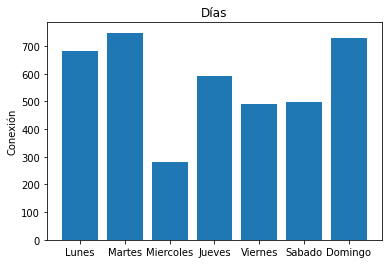

In [ ]:
objects = ('Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado','Domingo')
y_pos = dias1['Dia']
performance = dias1['HORAS']
plt.bar(y_pos, performance)
plt.xticks(y_pos, objects)
plt.ylabel('Conexión')
plt.title('Días')
plt.show()

Se realiza otra agrupación para saber la cantidad de conexiones, de acuerdo a la hora de consulta.

In [ ]:
hora = df.groupby(['Fecha','HORAS']).count()
hora['HORAS'] = hora.index

Exploramos la información de las visitas por día de la semana y por franja horaria. Se agrupa de acuerdo a cada combinación de día y hora, la cantidad de conexiones existentes.

In [ ]:
hora = hora[['id_usuario']]
hora = hora.reset_index()
hora

,Fecha,HORAS,id_usuario
0,2020-12-21,20,1
1,2020-12-21,21,2
2,2020-12-22,08,3
3,2020-12-22,09,1
4,2020-12-22,10,1
...,...,...,...
483,2021-11-01,12,12
484,2021-11-01,13,7
485,2021-11-01,14,6
486,2021-11-01,15,6


**Uniendo información de interés**


Los resultados de las conexiones por fecha y hora del día, fueron unidos a la tabla inicial de acuerdo a su fecha y franja horaria.

In [ ]:
left_join = pd.merge(df,hora, on =['Fecha','HORAS'], how = 'left')
left_join

,id_usuario_x,Calificadora,Correo,Fecha Consulta,Estado usuario,Fecha,Hora,Dia,HORAS,id_usuario_y
0,c2290d89dfc4,Buró de Crédito,gmail.com,19/01/21 9:20,ACTIVO,2021-01-19,09:20:00,1,09,22
1,8d24ef1d52d8,Buró de Crédito,gmail.com,19/01/21 8:28,ACTIVO,2021-01-19,08:28:00,1,08,24
2,a5120d2c47fa,Buró de Crédito,gmail.com,17/01/21 13:36,ACTIVO,2021-01-17,13:36:00,6,13,16
3,5a5d70893606,Buró de Crédito,edubc.mx,20/01/21 9:27,ACTIVO,2021-01-20,09:27:00,2,09,5
4,4a2082948031,Buró de Crédito,gmail.com,21/01/21 14:26,ACTIVO,2021-01-21,14:26:00,3,14,2
...,...,...,...,...,...,...,...,...,...,...
4017,a7b8edae9a16,Buró de Crédito,gmail.com,6/01/21 11:10,SIN VALIDAR,2021-06-01,11:10:00,1,11,6
4018,4b636433f200,Buró de Crédito,gmail.com,6/01/21 14:54,SIN VALIDAR,2021-06-01,14:54:00,1,14,4
4019,4b636433f200,Buró de Crédito,gmail.com,6/01/21 23:43,SIN VALIDAR,2021-06-01,23:43:00,1,23,5
4020,a7b8edae9a16,Buró de Crédito,gmail.com,6/01/21 21:21,SIN VALIDAR,2021-06-01,21:21:00,1,21,5


El 17, 18 y 19 de enero fueron los días que los usuarios tuvieron mayor interacción con la plataforma.

**Definición del conjunto de entrenamiento y validación**


Se determina el 67% de los datos para el conjunto de entrenamiento, y el 33% restante para el conjunto de validación.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(left_join[['id_usuario_y','Dia']], left_join['HORAS'], test_size=0.33, random_state=42)

Se define inicialmente los modelos de regresión lineal y árbol de decisión para ver los desempeños iniciales

**Regresión Lineal**

Se ajusta el modelo con los conjuntos de entrenamiento

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_1 = lr.predict(X_test)

Evaluación del modelo de regresión lineal. Se utiliza el estadistico R2 para evaluar su desempeño

In [ ]:
dt_scores = cross_val_score(lr, X_train, y_train, cv = 7)
print("mean cross validation score: {}".format(np.mean(dt_scores)))
print("score without cv: {}".format(lr.score(X_train, y_train)))

# on the test or hold-out set

print(r2_score(y_test, lr.predict(X_test)))
print(lr.score(X_test, y_test))

mean cross validation score: 0.13646030769009168
score without cv: 0.13904717603745353
0.1645270671801783
0.1645270671801783


De lo anterior se observa que no arroja buenos resultados. Se quiere volver a ajustar los datos con otro modelo

**Árbol de Decisiones**

Se define el modelo de arbol de decisiones y se ajusta con el conjunto de entrenamiento

In [ ]:
regressor = DecisionTreeRegressor(random_state=0)

In [ ]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
y_2 = regressor.predict(X_test)

Se evalúa su desempeño con las mismas métricas del modelo anterior

In [ ]:
dt_scores = cross_val_score(regressor, X_train, y_train, cv = 7)
print("mean cross validation score: {}".format(np.mean(dt_scores)))
print("score without cv: {}".format(regressor.score(X_train, y_train)))

# on the test or hold-out set

print(r2_score(y_test, regressor.predict(X_test)))
print(regressor.score(X_test, y_test))

mean cross validation score: 0.5905162451625249
score without cv: 0.6473981695077788
0.6067798697565447
0.6067798697565447


Se observa una mejora significativa frente al modelo de regresión lineal. Sin embargo, se quiere mejorar un poco el desempeño con modelos más robustos.

**Random Forest**

Se implementa el modelo de bosques aleatorios para buscar un mejor desempeño al arbol de decisiones sencillo. Se utilizan las mismas métricas y los mismos pasos para definir, entrenar y validar el modelo

In [ ]:
rf = RandomForestRegressor(random_state=0)

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_3 = rf.predict(X_test)

In [ ]:
dt_scores = cross_val_score(rf, X_train, y_train, cv = 7)
print("mean cross validation score: {}".format(np.mean(dt_scores)))
print("score without cv: {}".format(rf.score(X_train, y_train)))

# on the test or hold-out set

print(r2_score(y_test, rf.predict(X_test)))
print(rf.score(X_test, y_test))

mean cross validation score: 0.5915548675830886
score without cv: 0.6472082868149528
0.6062857890828071
0.6062857890828071


El resultado sin modificar los hiperparámetros por defecto resulta con un desempeño muy similar al modelo de árbol de decisión. Se buscará optimizar los parámetros al random forest

**Random Forest Optimizado**

Para optimizar los hiperparametros, se define una cuadrícula aleatoria, donde se le dan valores iniciales a los hiperparámetros tales como las características a considerar, el número maximo de niveles en cada arbol, el número minimo de muestras requeridas para separar un nodo, y el método para entrenar cada muestra en los árboles

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Número de árboles
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Caracteristicas a considerar
max_features = ['auto', 'sqrt']
# número máximo de niveles en un árbol
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Número mínimo de muestras requeridas para separar un nodo
min_samples_split = [2, 5, 10]
# Número mínimo de muestras requeridas en cada nodo hoja
min_samples_leaf = [1, 2, 4]
# Método para seleccionar muestras para entrenar cada árbol
bootstrap = [True, False]
# Crear una cuadrícula aleatoria
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


Se define el modelo base para optimizar, en este caso el random forest regressor. Luego se llama el método RandomizedSearchCV que crea e itera los valores de los hiperparámetros de estudio, con este modelo se entrena el conjunto de entrenamiento

In [ ]:
# Se crea el modelo base para ajustar
rfo = RandomForestRegressor()
# Se ahce una búsqueda aleatoria de pa´rametros, usando validación cruzada 
# Se realiza una búsqueda a través de 100 combinaciones diferentes
rf_random = RandomizedSearchCV(estimator = rfo, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# se ajusta el modelo de búsqueda en los datos
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

Este proceso tomó alrededor de 20 minutos para entrenar y ajustar

Al terminar se encuentran los mejores valores para los hiperpa´rametros dados

In [ ]:
rf_random.best_params_

NameError: ignored

Se define el modelo de random forest ajustando con los mejores hiperparámetros encontrados

In [ ]:
rfo = RandomForestRegressor(bootstrap=True, max_depth=100,max_features='auto',min_samples_leaf=1,min_samples_split=2,n_estimators=1400)
rfo.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_4 = rfo.predict(X_test)

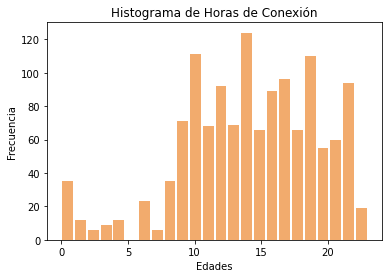

In [ ]:
plt.hist(x=y_4, bins=24, color='#F2AB6D', rwidth=0.85)
plt.title('Histograma de Horas de Conexión')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')

plt.show() #dibujamos el histograma

Se realiza la evaluación de su desempeño, de acuerdo a las mismas métricas de modelos anteriores. Este proceso tomó cerca de 25 minutos en evaluar la información

In [ ]:
dt_scores = cross_val_score(rfo, X_train, y_train, cv = 7)
print("mean cross validation score: {}".format(np.mean(dt_scores)))
print("score without cv: {}".format(rfo.score(X_train, y_train)))

# on the test or hold-out set

print(r2_score(y_test, rfo.predict(X_test)))
print(rfo.score(X_test, y_test))

mean cross validation score: 0.5908138755822667
score without cv: 0.647377728683438
0.6071019166653687
0.6071019166653687


**Relación entre Hora del Día y Día de la Semana**

A continuación se muestra un mapa de calor que permite observar las horas y los días de la semana con mayor cantidad de conexiones.

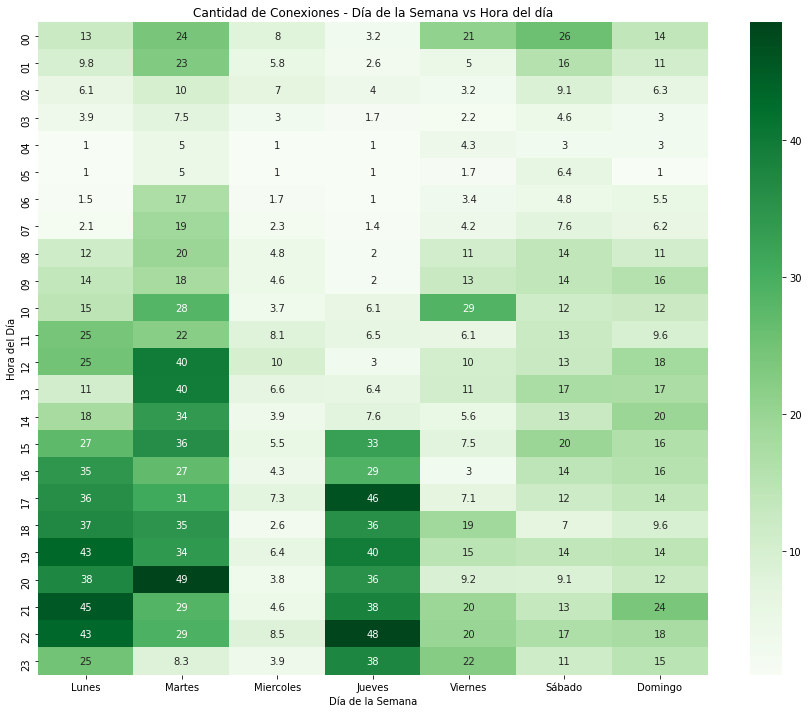

In [ ]:
left_join.sort_values('HORAS',ascending=False)
df_heatmap = left_join.pivot_table(index='HORAS',columns='Dia')
plt.figure(figsize = (15,12))
x_axis_labels = ['Lunes','Martes','Miercoles','Jueves','Viernes','Sábado','Domingo']
sns.heatmap(df_heatmap,annot=True,cmap="Greens", xticklabels=x_axis_labels)
plt.xlabel("Día de la Semana")
plt.ylabel("Hora del Día")
plt.title('Cantidad de Conexiones - Día de la Semana vs Hora del día')
plt.show()

De lo anterior se observa que los periodos de conexión con mayor ocurencia son los martes (entre 8pm - 9 pm), los jueves (entre 4pm - 5pm y entre 10 pm y 11pm), y también los lunes(entre 9pm y 11pm)

**Conclusiones**

Con el objetivo de ubicar las pautas publicitarias en el mejor horario posible, generamos un modelo de bosques aleatorios para la regresión teniendo como base la información de horas y cantidad de visitas por hora, además utilizamos un gridsearch Para buscar optimizar los resultados.

Las pautas publicitarias serán expuestas al público mayoritariamente los días lunes, martes y jueves (teniendo en cuenta el análisis descriptivo inicial y el mapa de calor) y en los horarios más probable y descritos por los gráficos martes (entre 8pm - 9 pm), los jueves (entre 4pm - 5pm y entre 10 pm y 11pm), y también los lunes(entre 9pm y 11pm)

Los días y los horarios seleccionados tendrán el 50% de las pautas publicitarias, y el otro 50% estará distribuido en el resto de los días y horas que contienen conteos mayores o iguales a 24 en su mapa de calor

**Bibliografía**

* 	W. Koehrsen, «Hyperparameter Tuning the Random Forest in Python,» 9 1 2018. [En línea]. Available: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74.
* 	scikit-learn, «sklearn.ensemble.RandomForestRegressor,» scikit-learn, 2020. [En línea]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.
* 	pandas, «Merge, join, concatenate and compare,» 2021. [En línea]. Available: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html.
